# **A3 Entrenamiento de Red Neuronal Artificial Simple**

**Julio Angel Arias Bartolo**

**1954467**

**LMV-N1**

Una de las primeras acciones que debemos tomar para iniciar con el entrenamiento de una red neuronal artificial es la importación de las licrerias que utilizaremos.

In [4]:
# Importar librerias
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

Otra de las cosas necesarias que debemos relizar es acceder a los datos para importarlos ya que son necesarios, y dependiendo cómo lo entrenaremos es conforme obtendremos la cantidad de datos.

La base de datos es llamada MNIST y es una base de datos que contiene 70 000 imágenes en las cuales se muestran diferentes números escritos a mano, que de la misma forma que la base de datos fashion_mnist son 60 000 imágenes de entrenamiento y 10 000 de prueba en un formato de 28 x 28 píxeles en una escala de gríses.

In [14]:
# Importar datos
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Es necesario asignar las etiquetas en las cuales se clasifican.

In [13]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

**Set de imagenes de entrenamiento**

Aquí podemos ver la cantidad de imágenes disponibles para el entrenamiento y el tamaño de ellas.

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Set de imagenes de prueba**

Se muestra la cantidad de imágenes de prueba que serán utilizadas para evaluar la capacidad de aprendizaje del modelo.

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

**Pre-Procesamiento**

El pre-procesamiento es realizado antes del entrenamiento en donde se incluye la normalización para después de eso pasar al entrenamiento.

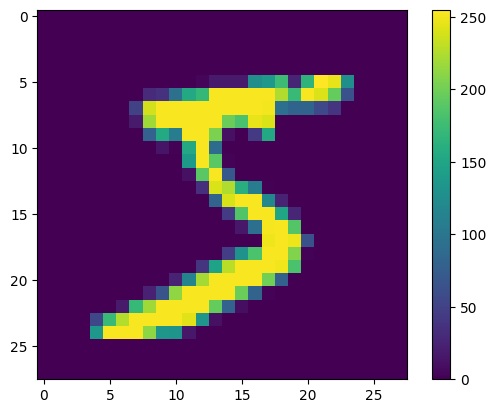

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
# Normalizar los valores
train_images = train_images / 255.0

test_images = test_images / 255.0

Podemos desplegar una cantidad de imágenes solamente para verlas con las etiquetas correspondientes a cada número.

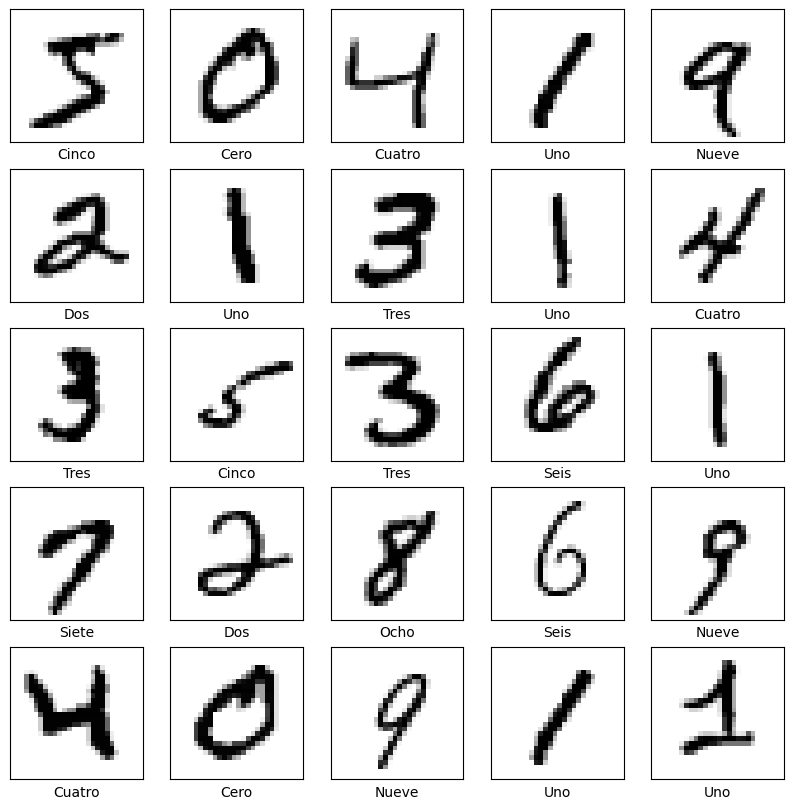

In [19]:
# Desplegar las primeras 25 imagenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construir el modelo


Ahora sí podemos comenzar a seleccionar el modelo con el que vamos a trabajar y las especificaciones que necesitamos en este modelo.

**Configurar capas**

La configuración de las capas a utilizar serán solamente 3, ya que es una red neuronal simple, en la cual tenemos el aplanamiento de las imágenes del tamaño 28x28, luego tenemos la capa intermedia con una densidad de 128 neuronas y por último la capa de salida con una cantidad de 10 neuronas, las cuales cada una corresponde a una categoría, es decir un número del 0 al 9.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**Compilación del modelo**

En la compilación del modelo se presentan los 2 parámetros que serán fundamentales al entrenamiento de la red neuronal artificial, la función de pérdida y la exáctitud dentro del entrenamiento.

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Entrenar modelo**

En este punto, es la parte fundamental, es donde seleccionamos la cantidad de épocas que deseamos entrenar, y procedemos con el entrenamiento de la red neuronal artificial simple.

In [39]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9957
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0121 - accuracy: 0.9962
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0093 - accuracy: 0.9972
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9969


**Evaluar exactitud**

A continuación se pregunta la presición que tuvo el modelo en base a las imágenes del test para poder comparar la presición en el entrenamiento y la presición en la prueba y comparar los resultados para ver si nuestro modelo no se encuentra sobreajustado.

In [40]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0951 - accuracy: 0.9793 - 372ms/epoch - 1ms/step

Test accuracy: 0.9793000221252441


**Hacer predicciones**

Ya una vez que se realizó el entrenamiento se pueden hacer las predicciones que sean necesarias para corroborar la exactitud del modelo.

In [41]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Podemos realizar una predicción dentro de la cantidad de imágenes de prueba que tenemos disponibles en donde a continuación podemos ver una de ellas.

In [50]:
predictions[1954]

array([4.7938592e-15, 3.8494016e-16, 7.0480221e-13, 1.9662100e-08,
       1.7671202e-07, 9.9994916e-01, 7.6393562e-06, 2.5511865e-11,
       3.8087874e-05, 4.7841713e-06], dtype=float32)

Notamos que la predicción con un número mayor es la que se encuentra en la posición 6 del arreglo, la cual corresponde a la etiqueta del número 5 ya que recordemos que comienzan las etiquetas desde el número 0 hasta llegar al 9.

Abajo vemos lo que nos arroja el resultado de la predicción.

In [45]:
np.argmax(predictions[1954])

5

Y después comparamos con el valor correcto etiquetado en la correspondiente imagen.

In [46]:
test_labels[1954]

5

**Graficación de la imagen con su etiqueta**

Una forma muy cómoda de ver si nuestro modelo ha hecho una buena predicción es haciendo un análisis visual de algunas imágenes con sus gráficas de predicción.

In [51]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

A continuación vemos 2 de las imágenes de prueba con sus respectivas gráficas de predicción.

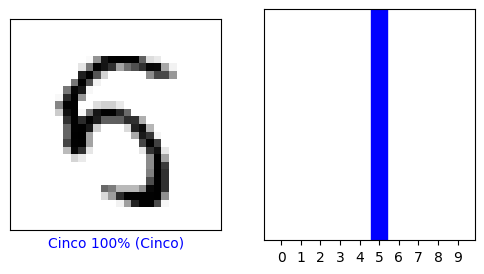

In [52]:
i = 1954
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

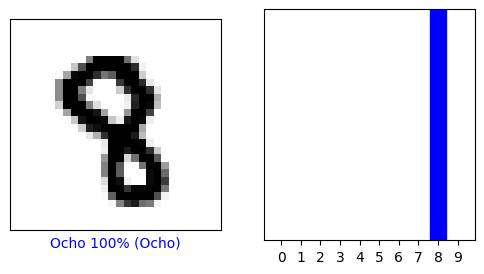

In [49]:
i = 1267
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Aquí podemos ver una sección más amplia de imágenes, en concreto de 15 imágenes con su gráfica de predicción en lo cual podemos estar seguros que cada una corresponde con su respectiva imágen.

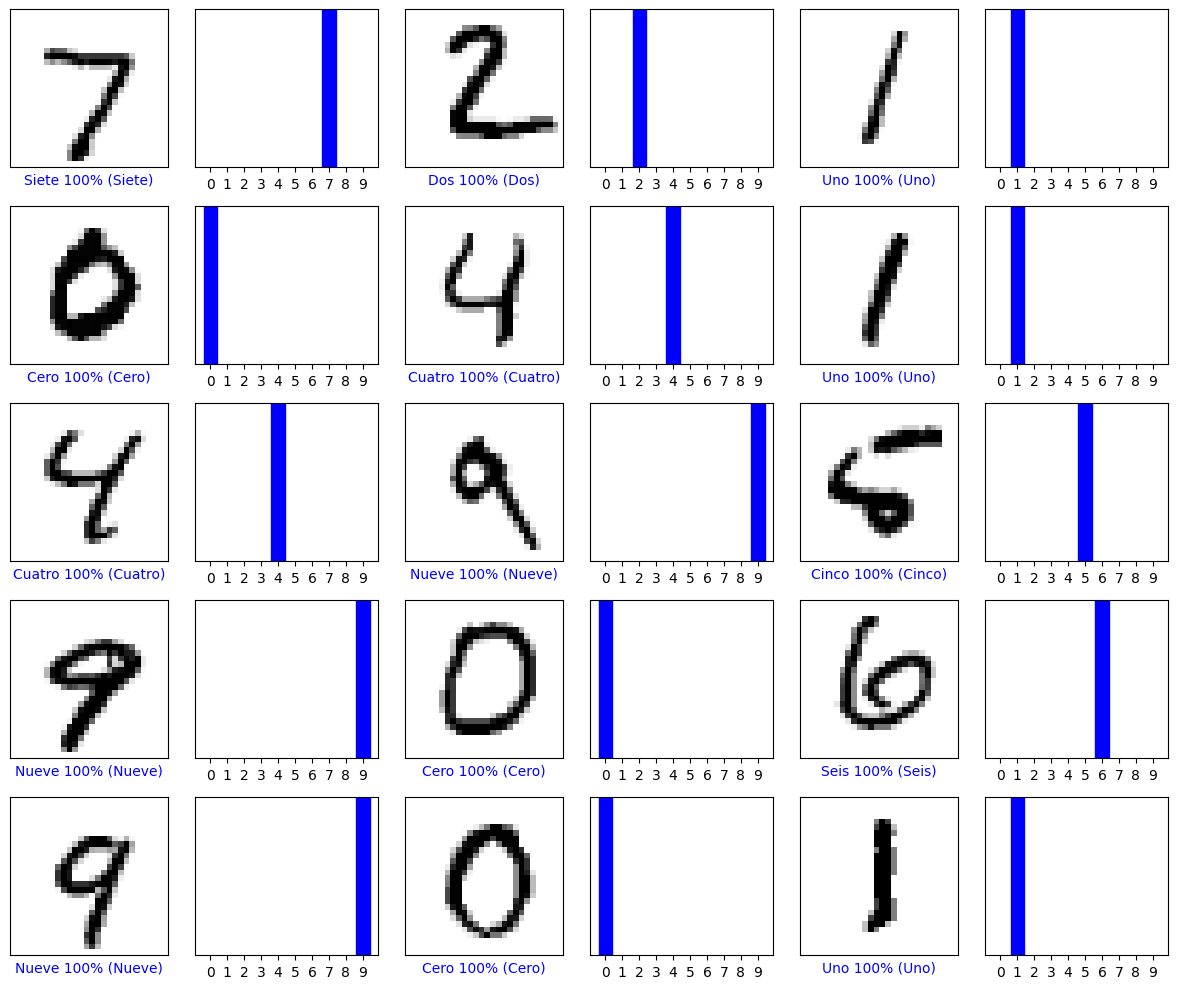

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Como finalización de este modelo de entrenamiento de Red Neuronal Artificial Simple se concluye con una satisfactoria predicción de las imágenes con una alta presición. Podemos seguir graficando más imágenes de prueba para corroborarlas todas, pero al tener una diferencia mínima entre la exactitud del entrenamiento (99.6%) y la exactitud de la prueba (97.9) con lo cual podemos tener la certeza de que ha logrado una buena generalización de la base de datos, haciendo las predicciones acertadas.